In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

In [4]:
seoul_cctv = pd.read_csv('../data/seoul_cctv.csv', encoding = 'utf-8', thousands = ',')
seoul_cctv.head()

,구분,총계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,계,75431,5901,1619,2228,0,4368,6742,8300,10100,9687,11657,10232
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456


In [5]:
seoul_cctv.columns

Index(['구분', '총계', '2011년 이전', '2011년', '2012년', '2013년', '2014년', '2015년',
       '2016년', '2017년', '2018년', '2019년', '2020년'],
      dtype='object')

In [6]:
seoul_cctv.rename(columns = {seoul_cctv.columns[0] : '구별', seoul_cctv.columns[1] : '소계', }, inplace = True)
seoul_cctv.head()

,구별,소계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,계,75431,5901,1619,2228,0,4368,6742,8300,10100,9687,11657,10232
1,종로구,1729,216,7,10,582,210,150,1,259,85,9,200
2,중 구,2001,16,6,199,90,125,218,333,462,228,194,130
3,용산구,2383,31,3,71,234,125,221,298,351,125,307,617
4,성동구,3515,487,26,122,207,112,335,309,790,409,262,456


In [7]:
seoul_cctv.sort_values(by = '소계', ascending = False).head(5)

,구별,소계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년
0,계,75431,5901,1619,2228,0,4368,6742,8300,10100,9687,11657,10232
23,강남구,6645,62,61,72,368,455,845,1307,1004,744,796,931
21,관악구,4909,320,120,84,431,441,608,620,684,674,596,331
17,구로구,4075,643,209,216,349,187,268,326,540,488,434,415
19,영등포구,3773,450,122,136,238,123,209,248,311,658,65,1213


In [11]:
seoul_cctv['최근증가율'] = (seoul_cctv['2018년'] + seoul_cctv['2019년'] + seoul_cctv['2020년']) / (seoul_cctv['2017년'] + seoul_cctv['2016년'] + seoul_cctv['2015년']) * 100
seoul_cctv.sort_values(by = '최근증가율', ascending = False).head(5)

,구별,소계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근증가율
7,중랑구,3285,298,21,23,253,88,138,159,152,173,1050,930,479.510022
9,강북구,2462,0,0,0,55,85,130,311,34,385,976,486,388.842105
24,송파구,2743,64,9,61,86,85,215,146,241,542,1068,226,304.983389
19,영등포구,3773,450,122,136,238,123,209,248,311,658,65,1213,252.083333
25,강동구,2547,223,45,27,227,49,154,202,273,377,356,614,214.149444


In [9]:
seoul_pop = pd.read_excel('../data/report.xls', header = 2)
seoul_pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2021.1/4,합계,4400403,9828094,4774856,5053238,9598484,4667524,4930960,229610,107332,122278,2.18,1567819
1,2021.1/4,종로구,74113,156567,75772,80795,147296,71644,75652,9271,4128,5143,1.99,27781
2,2021.1/4,중구,63746,133708,65312,68396,124552,60851,63701,9156,4461,4695,1.95,24767
3,2021.1/4,용산구,112881,243336,118120,125216,229013,110181,118832,14323,7939,6384,2.03,39575
4,2021.1/4,성동구,135883,298421,145358,153063,291906,142506,149400,6515,2852,3663,2.15,45968


In [12]:
seoul_pop = seoul_pop.iloc[:, [1, 3, 6, 9, 13]]
seoul_pop

,자치구,계,계.1,계.2,65세이상고령자
0,합계,9828094,9598484,229610,1567819
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968
5,광진구,356191,343392,12799,50370
6,동대문구,352570,338875,13695,60868
7,중랑구,396807,392041,4766,69841
8,성북구,444295,434826,9469,73158
9,강북구,307537,304078,3459,62893


In [13]:
seoul_pop.rename(columns = {seoul_pop.columns[0] : '구별',
                           seoul_pop.columns[1] : '인구수',
                           seoul_pop.columns[2] : '한국인',
                           seoul_pop.columns[3] : '외국인',
                           seoul_pop.columns[4] : '고령자',}, inplace = True)
seoul_pop.head()

,구별,인구수,한국인,외국인,고령자
0,합계,9828094,9598484,229610,1567819
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968


In [14]:
seoul_pop.drop([0], inplace = True)
seoul_pop.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,156567,147296,9271,27781
2,중구,133708,124552,9156,24767
3,용산구,243336,229013,14323,39575
4,성동구,298421,291906,6515,45968
5,광진구,356191,343392,12799,50370


In [15]:
seoul_pop['외국인비율'] = seoul_pop['외국인'] / seoul_pop['인구수'] * 100
seoul_pop['고령자비율'] = seoul_pop['고령자'] / seoul_pop['인구수'] * 100
seoul_pop.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,156567,147296,9271,27781,5.921427,17.743841
2,중구,133708,124552,9156,24767,6.847758,18.523200
3,용산구,243336,229013,14323,39575,5.886100,16.263520
4,성동구,298421,291906,6515,45968,2.183157,15.403742
5,광진구,356191,343392,12799,50370,3.593297,14.141289


In [16]:
seoul_pop.sort_values(by = '인구수', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667115,661411,5704,94145,0.855025,14.112260
16,강서구,582804,577320,5484,89377,0.940968,15.335687
23,강남구,539538,534796,4742,75602,0.878900,14.012359
11,노원구,522225,518278,3947,85906,0.755804,16.449998
21,관악구,504140,490352,13788,78400,2.734955,15.551236


In [17]:
seoul_pop.sort_values(by = '외국인', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
17,구로구,426675,401074,25601,70717,6.000117,16.573973
19,영등포구,403070,377590,25480,61197,6.321483,15.182723
18,금천구,244564,229844,14720,39781,6.018874,16.266090
3,용산구,243336,229013,14323,39575,5.886100,16.263520
21,관악구,504140,490352,13788,78400,2.734955,15.551236


In [18]:
seoul_pop.sort_values(by = '외국인비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
2,중구,133708,124552,9156,24767,6.847758,18.523200
19,영등포구,403070,377590,25480,61197,6.321483,15.182723
18,금천구,244564,229844,14720,39781,6.018874,16.266090
17,구로구,426675,401074,25601,70717,6.000117,16.573973
1,종로구,156567,147296,9271,27781,5.921427,17.743841


In [19]:
seoul_pop.sort_values(by = '고령자', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667115,661411,5704,94145,0.855025,14.112260
16,강서구,582804,577320,5484,89377,0.940968,15.335687
11,노원구,522225,518278,3947,85906,0.755804,16.449998
12,은평구,479607,475501,4106,85140,0.856118,17.752034
21,관악구,504140,490352,13788,78400,2.734955,15.551236


In [20]:
seoul_pop.sort_values(by = '고령자비율', ascending = False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,307537,304078,3459,62893,1.124743,20.450547
10,도봉구,323752,321717,2035,62360,0.628568,19.261657
2,중구,133708,124552,9156,24767,6.847758,18.523200
12,은평구,479607,475501,4106,85140,0.856118,17.752034
1,종로구,156567,147296,9271,27781,5.921427,17.743841


In [49]:
data_result = pd.merge(seoul_cctv, seoul_pop, on = '구별')
data_result.head()

,구별,소계,2011년 이전,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1729,216,7,10,582,210,150,1,259,85,9,200,71.707317,156567,147296,9271,27781,5.921427,17.743841
1,용산구,2383,31,3,71,234,125,221,298,351,125,307,617,120.574713,243336,229013,14323,39575,5.886100,16.263520
2,성동구,3515,487,26,122,207,112,335,309,790,409,262,456,78.591353,298421,291906,6515,45968,2.183157,15.403742
3,광진구,2556,11,24,57,100,187,98,52,675,465,712,175,163.878788,356191,343392,12799,50370,3.593297,14.141289
4,동대문구,2315,960,130,146,60,29,111,233,136,197,209,104,106.250000,352570,338875,13695,60868,3.884335,17.264089


In [50]:
data_result.drop(data_result.iloc[:, [2]], axis = 1, inplace = True)

In [51]:
data_result.drop(data_result.iloc[:, 3:12], axis = 1, inplace = True)

In [52]:
data_result

,구별,소계,2011년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,종로구,1729,7,71.707317,156567,147296,9271,27781,5.921427,17.743841
1,용산구,2383,3,120.574713,243336,229013,14323,39575,5.886100,16.263520
2,성동구,3515,26,78.591353,298421,291906,6515,45968,2.183157,15.403742
3,광진구,2556,24,163.878788,356191,343392,12799,50370,3.593297,14.141289
4,동대문구,2315,130,106.250000,352570,338875,13695,60868,3.884335,17.264089
5,중랑구,3285,21,479.510022,396807,392041,4766,69841,1.201088,17.600748
6,성북구,3754,41,131.947484,444295,434826,9469,73158,2.131242,16.466087
7,강북구,2462,0,388.842105,307537,304078,3459,62893,1.124743,20.450547
8,도봉구,1356,49,169.086022,323752,321717,2035,62360,0.628568,19.261657
9,노원구,2282,0,56.240126,522225,518278,3947,85906,0.755804,16.449998


In [53]:
data_result.set_index('구별', inplace = True)
data_result.head()

,소계,2011년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,
종로구,1729,7,71.707317,156567,147296,9271,27781,5.921427,17.743841
용산구,2383,3,120.574713,243336,229013,14323,39575,5.886100,16.263520
성동구,3515,26,78.591353,298421,291906,6515,45968,2.183157,15.403742
광진구,2556,24,163.878788,356191,343392,12799,50370,3.593297,14.141289
동대문구,2315,130,106.250000,352570,338875,13695,60868,3.884335,17.264089


In [54]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.39903693],
       [-0.39903693,  1.        ]])

In [55]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.10508014],
       [-0.10508014,  1.        ]])

In [56]:
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.42267883],
       [0.42267883, 1.        ]])

In [57]:
data_result.sort_values(by = '소계', ascending = False).head()

,소계,2011년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,
강남구,6645,61,78.295311,539538,534796,4742,75602,0.878900,14.012359
관악구,4909,120,83.734310,504140,490352,13788,78400,2.734955,15.551236
구로구,4075,209,117.901235,426675,401074,25601,70717,6.000117,16.573973
영등포구,3773,122,252.083333,403070,377590,25480,61197,6.321483,15.182723
성북구,3754,41,131.947484,444295,434826,9469,73158,2.131242,16.466087


In [58]:
data_result.sort_values(by = '인구수', ascending = False).head()

,소계,2011년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,
송파구,2743,9,304.983389,667115,661411,5704,94145,0.855025,14.112260
강서구,2437,29,124.361949,582804,577320,5484,89377,0.940968,15.335687
강남구,6645,61,78.295311,539538,534796,4742,75602,0.878900,14.012359
노원구,2282,0,56.240126,522225,518278,3947,85906,0.755804,16.449998
관악구,4909,120,83.734310,504140,490352,13788,78400,2.734955,15.551236


In [61]:
# plt.rcParams['axes.unicode_minus'] = False

# if platform.system() == 'Darwin':
#     rc('font', family = 'AppleGothic')
# elif platform.system() == 'Windows':
#     path = 'c:\\Windows\\Fonts\\malgun.ttf'
#     font_name = font_manager.FontProperties(fname - path).get_name()
#     rc('font', family = font_name)
# elif platform.system() == 'Linux':
#     plt.rc('font', family = 'NanumBarunGothic')
# else:
#     print('Unknown system... sorry!')

NameError: name 'fname' is not defined

In [62]:
plt.rc('font', family = 'Malgun Gothic')  # 글씨체 불러오기
plt.rcParams['axes.unicode_minus'] = False # '-' 기호 깨지는거 방지

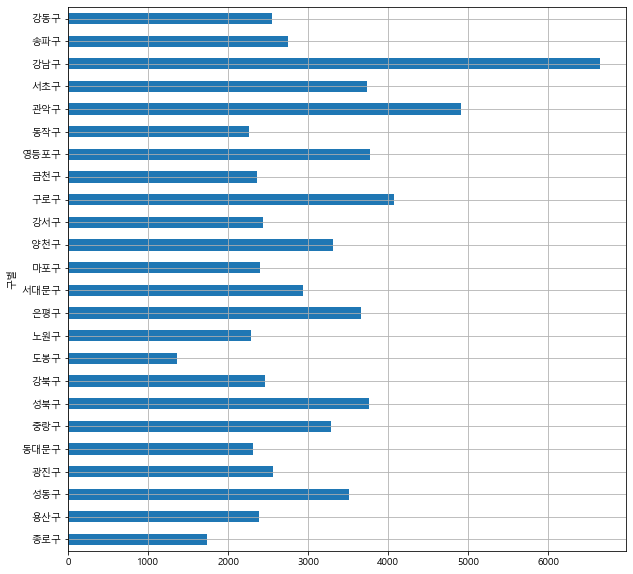

In [65]:
plt.figure(figsize = (10, 10))
data_result['소계'].plot(kind = 'barh', grid = True)
plt.show()

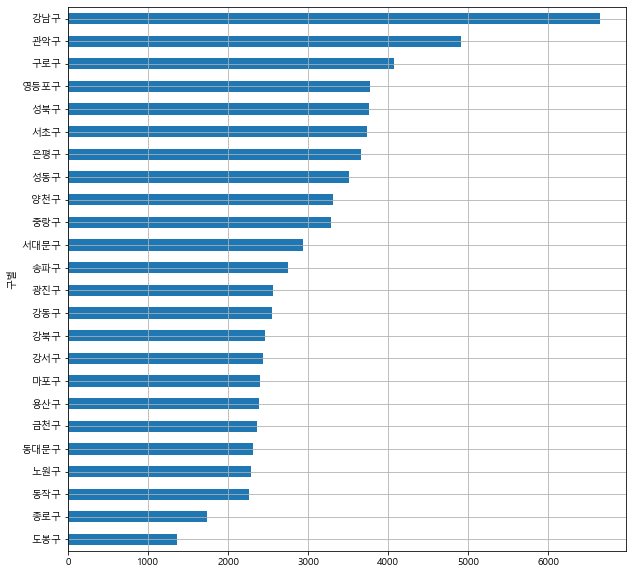

In [66]:
plt.figure(figsize = (10, 10))
data_result['소계'].sort_values().plot(kind = 'barh', grid = True)
plt.show()

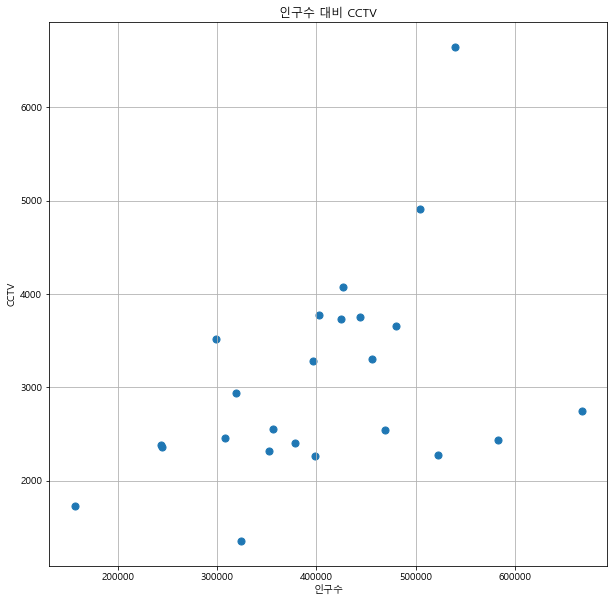

In [69]:
plt.figure(figsize = (10, 10))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.title('인구수 대비 CCTV')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [70]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([4.05606783e-03, 1.42120470e+03])

In [71]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

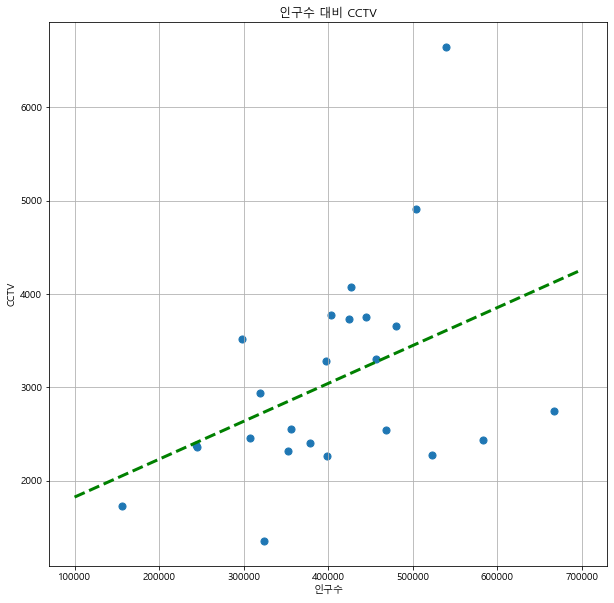

In [72]:
plt.figure(figsize = (10, 10))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.plot(fx, f1(fx), ls = '--', lw = 3, color = 'g')
plt.title('인구수 대비 CCTV')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [73]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by = '오차', ascending =False)
df_sort.head()

,소계,2011년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,,
강남구,6645,61,78.295311,539538,534796,4742,75602,0.878900,14.012359,3035.392574
관악구,4909,120,83.734310,504140,490352,13788,78400,2.734955,15.551236,1442.969263
송파구,2743,9,304.983389,667115,661411,5704,94145,0.855025,14.112260,1384.068392
도봉구,1356,49,169.086022,323752,321717,2035,62360,0.628568,19.261657,1378.364772
강서구,2437,29,124.361949,582804,577320,5484,89377,0.940968,15.335687,1348.097257


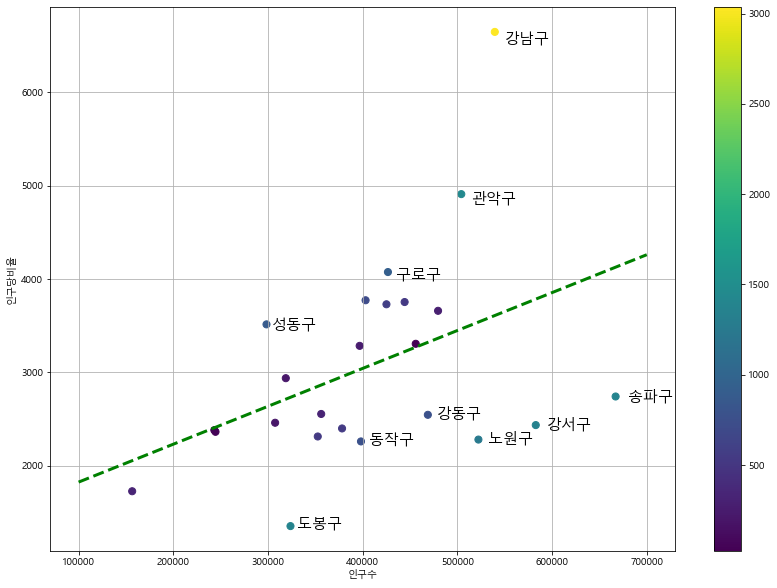

In [74]:
plt.figure(figsize = (14, 10))
plt.scatter(data_result['인구수'], data_result['소계'], c = data_result['오차'], s = 50)
plt.plot(fx, f1(fx), ls = '--', lw = 3, color = 'g')

for n in range(10):
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['소계'][n] * 0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()